In [106]:
# Import of required libraries
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.stats.outliers_influence import OLSInfluence

In [ ]:
# Data import and check

In [10]:
## Import of the data
adm_data = pd.read_csv("adm_data.csv")
adm_data.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [8]:
## Data check
print(adm_data.shape)
adm_data.info()

(400, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [11]:
## Replacement of spaces with underscores ("_") in column names
adm_data.columns = adm_data.columns.str.replace(' ', '_') 
adm_data.head(3)

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72


In [ ]:
# TOEFL_Score exploration

In [15]:
## TOEFL_Score mean and median
TOEFL_score_mean = adm_data["TOEFL_Score"].mean()
TOEFL_score_median = adm_data["TOEFL_Score"].median()
print (f"TOEFL_Score mean is {TOEFL_score_mean } and TOEFL_Score median is {TOEFL_score_median }.")

TOEFL_Score mean is 107.41 and TOEFL_Score median is 107.0. 


In [16]:
## TOEFL_Score standard deviation
TOEFL_score_std = adm_data["TOEFL_Score"].std()
print (f"TOEFL_Score standard deviation is {TOEFL_score_std}.")

TOEFL_Score standard deviation is 6.069513777374126.


<Axes: xlabel='TOEFL_Score', ylabel='Count'>

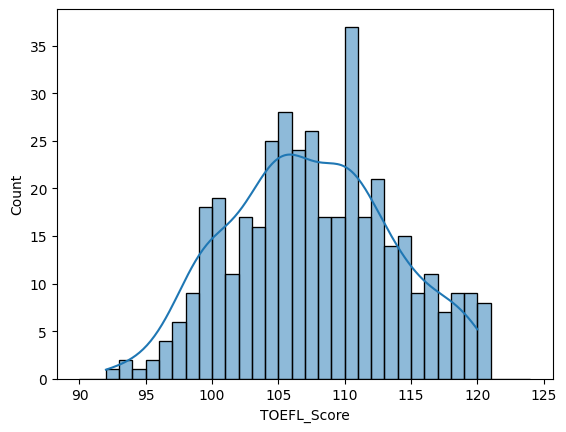

In [23]:
## TOEFL_Score histogram
sns.histplot(adm_data["TOEFL_Score"], kde=True, bins=range(90, 125, 1) )

In [24]:
## TOEFL_score normality test
stats.normaltest(adm_data["TOEFL_Score"])

NormaltestResult(statistic=11.070212103496331, pvalue=0.003945790155853822)

In [ ]:
## Since p-value is smaller than 0.05, we reject H1 hypothesis and we accept H0 hypthesis. This data do NOT have normal distribution.

In [ ]:
# GRE_Score analysis

In [25]:
## Data separation by Research
adm_data_research_1 = adm_data[adm_data["Research"] == 1]
adm_data_research_0 = adm_data[adm_data["Research"] == 0]

In [30]:
## Mean GRE_Score by group
adm_data_research_1_GRE_mean = adm_data_research_1["GRE_Score"].mean()
adm_data_research_0_GRE_mean = adm_data_research_0["GRE_Score"].mean()
print (f"The mean GRE_Score of students with research experience is {adm_data_research_1_GRE_mean}. The mean GRE_Score of students without research experience is {adm_data_research_0_GRE_mean}.")

The mean GRE_Score of students with research experience is 322.85388127853884. The mean GRE_Score of students without research experience is 309.49171270718233.


<Axes: xlabel='Research', ylabel='GRE_Score'>

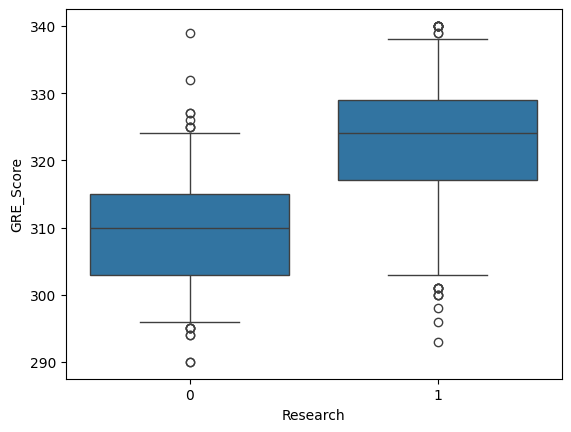

In [34]:
## Out of curiosity, I wanted to see the data in boxplot
sns.boxplot(adm_data, x= "Research", y= "GRE_Score", whis=[5, 95])

In [ ]:
## Statistical evaluation of difference in GRE_Score depending on Research experience

In [49]:
### GRE_Score normality test
_, p_value_researech_0 = stats.normaltest(adm_data_research_0["GRE_Score"])
p_value_researech_0 = float(p_value_researech_0)
p_value_researech_0

_, p_value_researech_1 = stats.normaltest(adm_data_research_1["GRE_Score"])
p_value_researech_1 = float(p_value_researech_1)
p_value_researech_1
print (f"Normality tests p-values are {p_value_researech_0} for Research_0 groupp and {p_value_researech_1} for Research_1 group.")

Normality tests p-values are 0.6076717821415273 for Research_0 groupp and 0.005145412486026274 for Research_1 group.


In [ ]:
### Research_0 group does have normally distributed GRE_score, on the contrary Research_1 group does  not have normally distributed GRE_score, with significance level 0,05. 
### It might be because in the Research_0 group manz students reached max GRE_Score limit 340.
### Therefore I consulted ChatGPT and decided to use Mann-Whitney U test

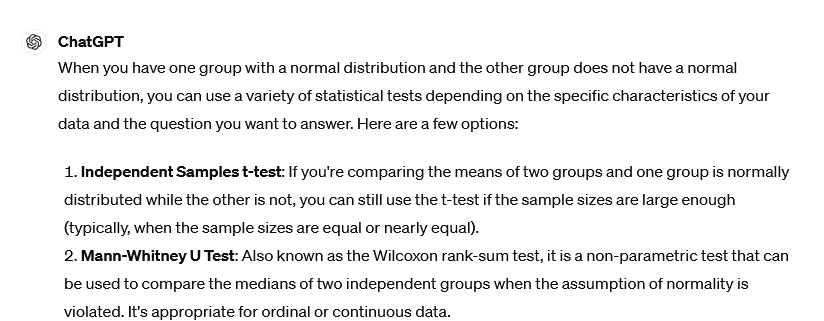

In [53]:
### Statistical evaluation of difference in GRE_Score between Research_0 and Research_1 group
statistics, pvalue = stats.mannwhitneyu(adm_data_research_0["GRE_Score"], adm_data_research_1["GRE_Score"])
pvalue

1.1433386421648098e-32

In [ ]:
### P-value is "very small", therefore we reject H0 and accept H1: There IS statistically significant difference in GRE_Score between Research_0 and Research_1 group!

In [ ]:
# TOEFL_Score and GRE_Score correlation

In [59]:
## Correlation
adm_data[["TOEFL_Score", "GRE_Score"]].corr()

,TOEFL_Score,GRE_Score
TOEFL_Score,1.000000,0.835977
GRE_Score,0.835977,1.000000


In [ ]:
## The correlation is relatively high 0.84 is quite a lot if we take into account that 1.00 is maximum. 
## The correlation is positive, which means that when one parameter increases, the other shoud increase as well and vice versa.

In [ ]:
## Correlation graph

In [60]:
### First of all, I need to find the other variable, which has the highest correlation coeficient with Chance_of_Admit
adm_data.corr()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_
Serial_No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE_Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL_Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University_Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR_,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance_of_Admit_,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
### It is GRE_Score

<Axes: xlabel='GRE_Score', ylabel='Chance_of_Admit_'>

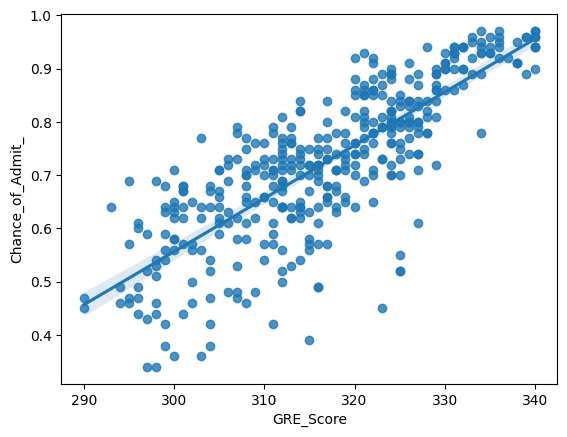

In [63]:
### Correlation plot
sns.regplot(adm_data, x= "GRE_Score", y = "Chance_of_Admit_")

In [ ]:
# Boxplot

<Axes: ylabel='Chance_of_Admit_'>

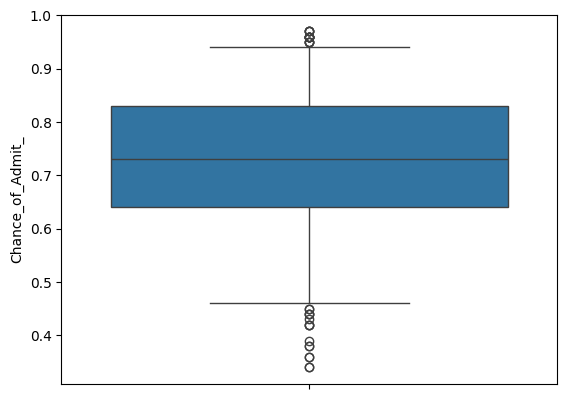

In [67]:
## Boxplot
sns.boxplot(adm_data, y = "Chance_of_Admit_", whis= [5,95])

In [78]:
## Removing outliers - removing everything below 0.05 quantile and over 0.95 quantile
q_05 = adm_data["Chance_of_Admit_"].quantile(0.05)
q_95 = adm_data["Chance_of_Admit_"].quantile(0.95)
adm_data_q_filter = adm_data[(adm_data["Chance_of_Admit_"] > q_05 )& (adm_data["Chance_of_Admit_"] < q_95) ]

<Axes: xlabel='GRE_Score', ylabel='Chance_of_Admit_'>

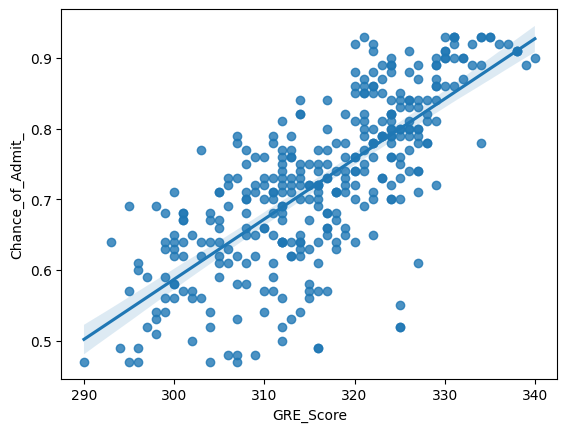

In [83]:
## Correlation plot after the filtration of outliers
sns.regplot(adm_data_q_filter, x= "GRE_Score", y = "Chance_of_Admit_")

In [80]:
# Linear regression

(400, 9)

In [88]:
## Generation of linear regression equation
formula = "Chance_of_Admit_ ~ GRE_Score + TOEFL_Score + CGPA + Research"
mod = smf.ols(formula=formula, data=adm_data_q_filter)
res = mod.fit()
res.summary()





<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance_of_Admit_   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     209.5
Date:                Sat, 04 May 2024   Prob (F-statistic):          2.48e-102
Time:                        13:17:27   Log-Likelihood:                 505.12
No. Observations:                 352   AIC:                            -998.2
Df Residuals:                     346   BIC:                            -975.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.9994      0.128     -7.804      0.000      -1.251      -0.747
GRE_Score             0.0015      0.001      2.571      0.011       0.000       0.003
University_Rating     0.0174      0.004      4.194      0.000       0.009       0.026
TOEFL_Score           0.0025      0.001      2.419      0.016       0.000       0.005
CGPA                  0.1077      0.012      9.321      0.000       0.085       0.130
Research              0.0265      0.008      3.512      0.001       0.012       0.041
==============================================================================
Omnibus:                       78.343   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.341
Skew:                          -1.183   Prob(JB):                     5.04e-34
Kurtosis:                       5.203   Cond. No.                     1.38e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.38e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
## I was not sure about SOP and LOR_ . Those variables might be relevant, but I am not 100 % sure about their meaning. 

In [ ]:
## The linear regression equation should look like this:
## "Chance of admit" = 0.0015 * "GRE_Score" + 0.0174 * "University_rating" + 0.0025 * "TOEFL_score" + 0.1077 * "CGPA" + 0.0265 * "Research" - 0.9994

In [ ]:
## Coeficient "Intercept" indicates that that the regression line crosses Y-axis at -0.994. The other coeficients multiply indicated values. 
## If they stood separately, they would influence the slope of the correlation line.
## All selected coeficients are statistically significant based on p-values. 


In [ ]:
## R-squared = 0.752. This value indicates that our model explained circa 3/4 of the variability. The remaining 1/4 is random/ concidence or influenced bz other variable wr do not know about.

In [93]:
## Cook distance
formula = "Chance_of_Admit_ ~ GRE_Score + TOEFL_Score + CGPA + Research"
mod = smf.ols(formula=formula, data=adm_data_q_filter)
results = mod.fit()
influence = OLSInfluence(results)
adm_data_q_filter['Cook_Distance'] = influence.cooks_distance[0]
adm_data_q_filter.head()


C:\Users\Linda\AppData\Local\Temp\ipykernel_6008\1003914658.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adm_data_q_filter['Cook_Distance'] = influence.cooks_distance[0]


,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR_,CGPA,Research,Chance_of_Admit_,Cook Distance,Cook_Distance
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.000487,0.000487
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.000401,0.000401
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.004023,0.004023
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.000351,0.000351
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.000003,0.000003


<Axes: xlabel='Cook_Distance', ylabel='Count'>

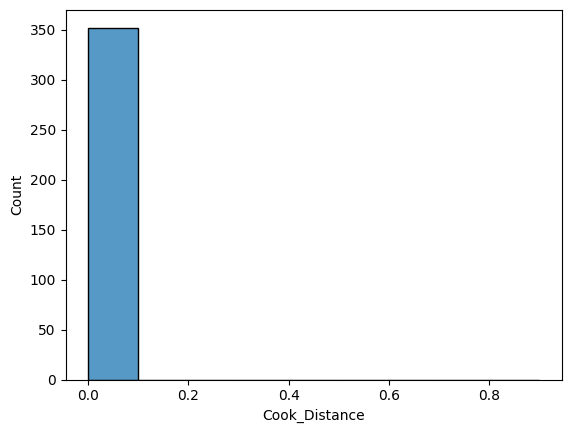

In [108]:
## Cook distance histogram

sns.histplot(adm_data_q_filter["Cook_Distance"],bins=np.arange(0, 1, 0.1))


In [110]:
adm_data_q_filter["Cook_Distance"].max()

0.04883289687730816

In [ ]:
## It is not necessary to remove any point, since all the Cook_Distances are smaller than 1.00. 